# Tests

## Example 1: Simple

In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [2]:
R.<t,x,y> = RIF[]

In [3]:
TM_ORDER = 10
UNPRECONDITIONING_ORDER = None

In [4]:
odes = [
    R(1),
    -y,
    x,
]
initials = [(0,0), (4,5), (1,2)]
system = System(
    R,
    [t, x, y],
    initials,
    odes,
)
reach = system.reach(2*pi, step=0.01,
    order=TM_ORDER,
    precompose_taylor_models=False,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    symbolic_composition=False)

calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2


In [5]:
reach_points = [system.with_y0([(0,0), (4 + k), (1 + k)]).reach(2*pi, step=0.01, order=TM_ORDER,
              precompose_taylor_models=False,
              symbolic_composition=False)
    for k in srange(0, 1, 0.1, include_endpoint=True)]
reach_bands = [system.with_y0([(0,0), (4 + k, 4.1 + k), (1 + k, 1.1 + k)]).reach(2*pi, step=0.01, order=TM_ORDER,
               precompose_taylor_models=False,
               symbolic_composition=False)
     for k in srange(0, 1, 0.1, include_endpoint=False)]

calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 4.0000000000000000]', '[1.0000000000000000 .. 1.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..4.0]
C = [1.0..1.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0999999999999996 .. 4.0999999999999997]', '[1.1000000000000000 .. 1.1000000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.1..4.1]
C = [1.1..1.1]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.2000000000000001 .. 4.2000000000000002]', '[1.1999999999999999 .. 1.2000000000000000]']
ode in polynomial ring
crude_root

In [6]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [7]:
reach.res

2

In [8]:
#S = Atomic(x + 1); S

In [9]:
S = Atomic(7 - (x + 1)**2 + y + x); S

Atomic(-x^2 - x + y + 6)

In [10]:
#S = Atomic(3 - y**2 + y); S

In [11]:
# Very Weird S
#S = Atomic(1e4 - y**2 + y + x**5 + x**3*y**6); S

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7260>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7370>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7480>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7590>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b76a0

/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


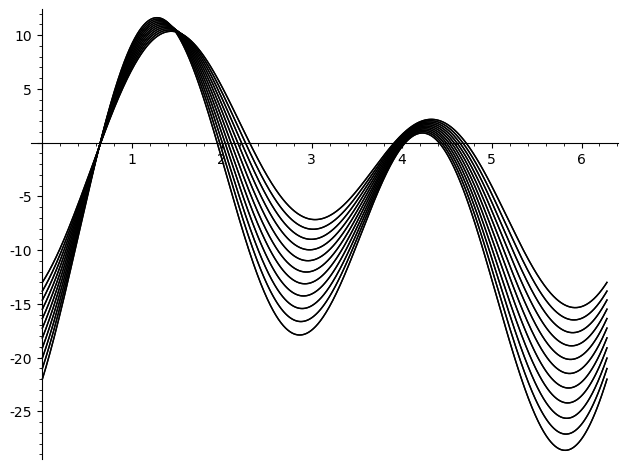

In [12]:
p_points = sum([
    S.sage_plot(r, symbolic_composition=False,
                color=('black', 'black'),
                fillcolor=('black',))
    for r in reach_points
], Graphics())
# p_points += sum([
#     S.sage_plot(r, symbolic_composition=False,
#                 color=('grey', 'grey'),
#                 fillcolor=('grey',))
#     for r in reach_bands
# ], Graphics())
p_points

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7150>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y


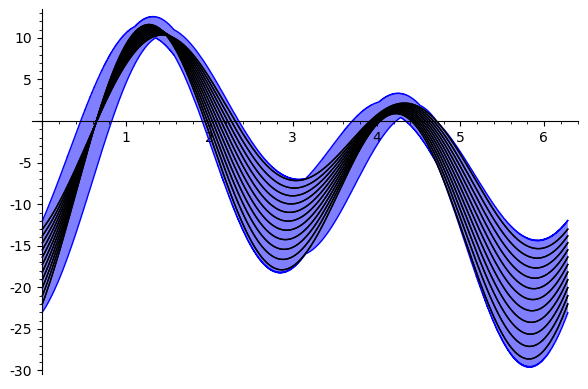

In [13]:
p1 = S.sage_plot(reach); p1 + p_points

In [24]:
SYMBOLIC_COMPOSITION_ORDER = -1

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7150>, 2*x*y + x + y, symbolic_composition=True, symbolic_composition_order=-1, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y


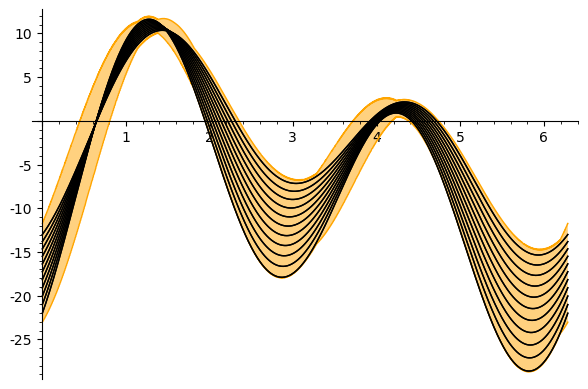

In [25]:
p2 = S.sage_plot(
    reach, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    color=('orange', 'orange'),
    fillcolor=('orange',),
)
p2 + p_points

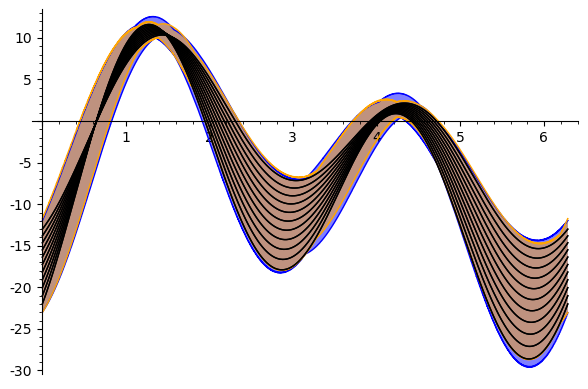

In [26]:
p1+p2+p_points

In [27]:
from functools import reduce

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535b7e10>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
symbolic_composition=False,symbolic_composition_order=10, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.10 seconds
roots = [[0.62791369907788041 .. 0.67211372988242580], [2.2541501400618710 .. 2.3100000000000090], [3.8934898090739782 .. 3.9568519971006762], [4.6757251763165905 .. 4.7124714978027447]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62791369907788041 .. 0.67211372988242580], 
 [2.2541501400618710 .. 2.3100000000000090], 
 [3.8934898090739782 .. 3.9568519971006762], 
 [4.6757251763165905 .. 4.7124714978027447]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62791369907788041 .. 0.67211372988242580], 
 [2.25415014

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f96535207b0>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
symbolic_composition=False,symbolic_composition_order=10, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.09 seconds
roots = [[0.62825835714841304 .. 0.66198724869043591], [1.9691101630241583 .. 2.0051083745133487], [3.9995562274621123 .. 4.0486530804768473], [4.4337642036543076 .. 4.4710361835445057]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62825835714841304 .. 0.66198724869043591], 
 [1.9691101630241583 .. 2.0051083745133487], 
 [3.9995562274621123 .. 4.0486530804768473], 
 [4.4337642036543076 .. 4.4710361835445057]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62825835714841304 .. 0.66198724869043591], 
 [1.96911016

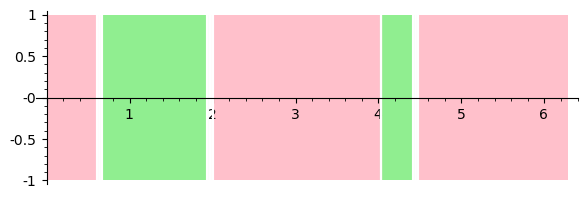

In [28]:
combined_signal = reduce(
    lambda a, b: a & b,
    (S.signal(r, symbolic_composition=False)
     for r in reach_bands),
)
combined_signal.plot()

In [29]:
INCLUDE_DERIVS = None

Precomposing Contexts: 1 items in 0.00 seconds
include_derivs = True
phi variables sfs = {y, x}
system sfs = System(R, (t, x, y), [0, [4 .. 5], [1 .. 2]], (1, -y, x), varmap=bidict({'t': t, 'x': x, 'y': y}))
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.03 seconds
Computed 63 flowpipes in 0.03511893004179001 sec
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7f964b969e10>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
symbolic_composition=False,symbolic_composition_order=10, tentative_unpre

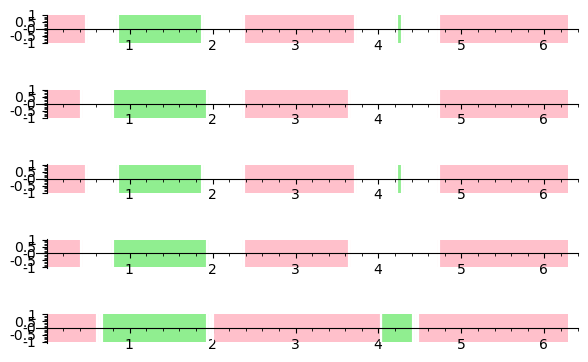

In [30]:
sig1 = S.signal_for_system(system, 2*pi, symbolic_composition=False,
    selective_unpreconditioning=False,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    unpreconditioning_include_derivs=INCLUDE_DERIVS)
sig2 = S.signal_for_system(
    system, 2*pi, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    selective_unpreconditioning=False,
    unpreconditioning_include_derivs=INCLUDE_DERIVS,
)
sig3 = S.signal_for_system(system, 2*pi, symbolic_composition=False,
    selective_unpreconditioning=True,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    selective_unpreconditioning_include_derivs=INCLUDE_DERIVS)
sig4 = S.signal_for_system(
    system, 2*pi, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    selective_unpreconditioning=True,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    unpreconditioning_include_derivs=INCLUDE_DERIVS
)

g = graphics_array([
    sig1.plot(),
    sig2.plot(),
    sig3.plot(),
    sig4.plot(),
    combined_signal.plot(),
], ncols=1)
g.show(aspect_ratio=1/6)

In [22]:
sig1

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.45140973772012278], False), ([0.84050550362655118 .. 1.8999999999999960], True), ([2.3763279338798870 .. 3.6862142030886905], False), ([4.2447619084053478 .. 4.2999999999999759], True), ([4.7168594972678175 .. 6.2831853071795872], False)], mask=None)

In [23]:
sig2

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.42336374259952936], False), ([0.80807924481532245 .. 1.9369353037238431], True), ([2.3562092333469304 .. 3.6689217311387932], False), ([4.7392255427521670 .. 6.2831853071795872], False)], mask=None)